In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler

In [3]:
import yfinance as yf
data = yf.download(tickers="BTC-USD" , start = "2023-01-01" ,end="2023-12-31" )
data = data.resample('1h').ffill()

# Display the fetched data
print(data)

data.to_csv('data2.csv')


[*********************100%%**********************]  1 of 1 completed
                             Open          High           Low         Close  \
Date                                                                          
2023-01-01 00:00:00  16547.914062  16630.439453  16521.234375  16625.080078   
2023-01-01 01:00:00  16547.914062  16630.439453  16521.234375  16625.080078   
2023-01-01 02:00:00  16547.914062  16630.439453  16521.234375  16625.080078   
2023-01-01 03:00:00  16547.914062  16630.439453  16521.234375  16625.080078   
2023-01-01 04:00:00  16547.914062  16630.439453  16521.234375  16625.080078   
...                           ...           ...           ...           ...   
2023-12-29 20:00:00  42614.644531  43124.324219  41424.062500  42099.402344   
2023-12-29 21:00:00  42614.644531  43124.324219  41424.062500  42099.402344   
2023-12-29 22:00:00  42614.644531  43124.324219  41424.062500  42099.402344   
2023-12-29 23:00:00  42614.644531  43124.324219  41424.062500 

In [4]:
data_dir = 'data2.csv'
df = pd.read_csv(data_dir)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01 00:00:00,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-01 01:00:00,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2,2023-01-01 02:00:00,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
3,2023-01-01 03:00:00,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
4,2023-01-01 04:00:00,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8713.000000,8713.000000,8713.000000,8713.000000,8713.000000,8.713000e+03
mean,28716.870302,29193.629541,28318.442709,28787.420339,28787.420339,1.826194e+10
std,5817.984518,5918.124426,5708.166806,5825.683456,5825.683456,8.539918e+09
min,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,5.331173e+09
25%,25905.425781,26203.439453,25640.261719,25918.728516,25918.728516,1.209778e+10
50%,27726.083984,28178.144531,27216.001953,27745.884766,27745.884766,1.610072e+10
75%,30291.611328,30555.537109,29921.822266,30295.806641,30295.806641,2.292296e+10
max,44180.019531,44705.515625,43627.597656,44166.601562,44166.601562,5.462223e+10


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

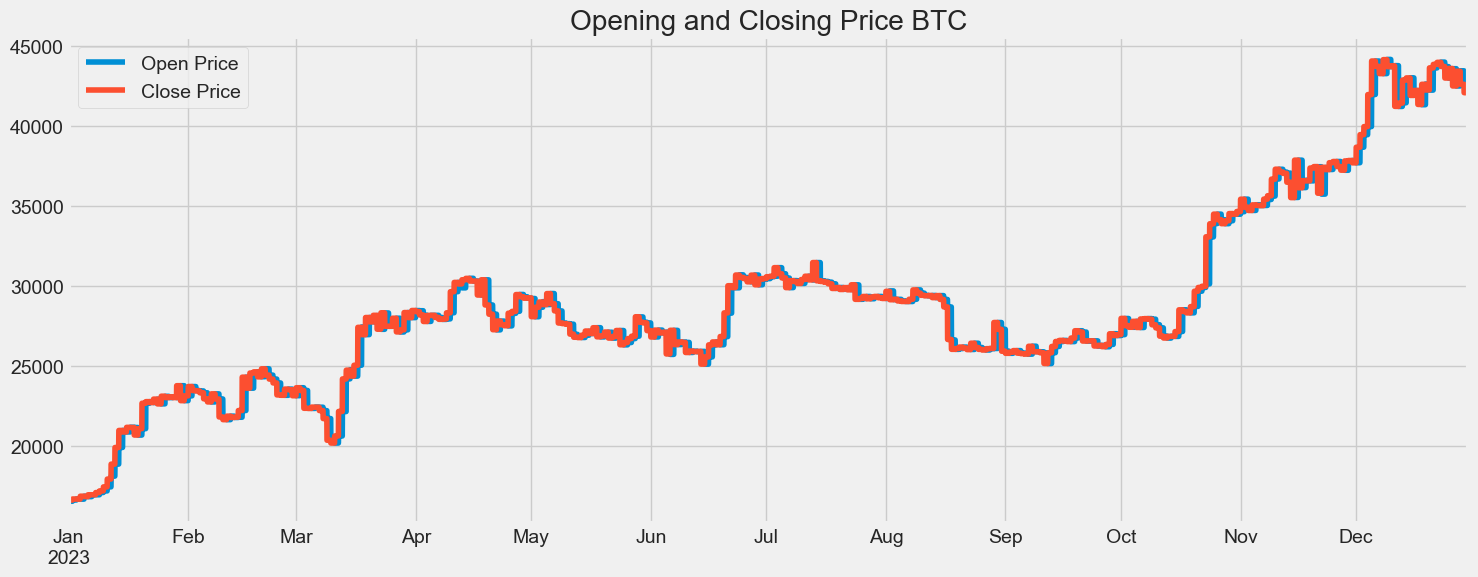

In [7]:
plt.figure(figsize=(15, 6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening and Closing Price BTC')
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

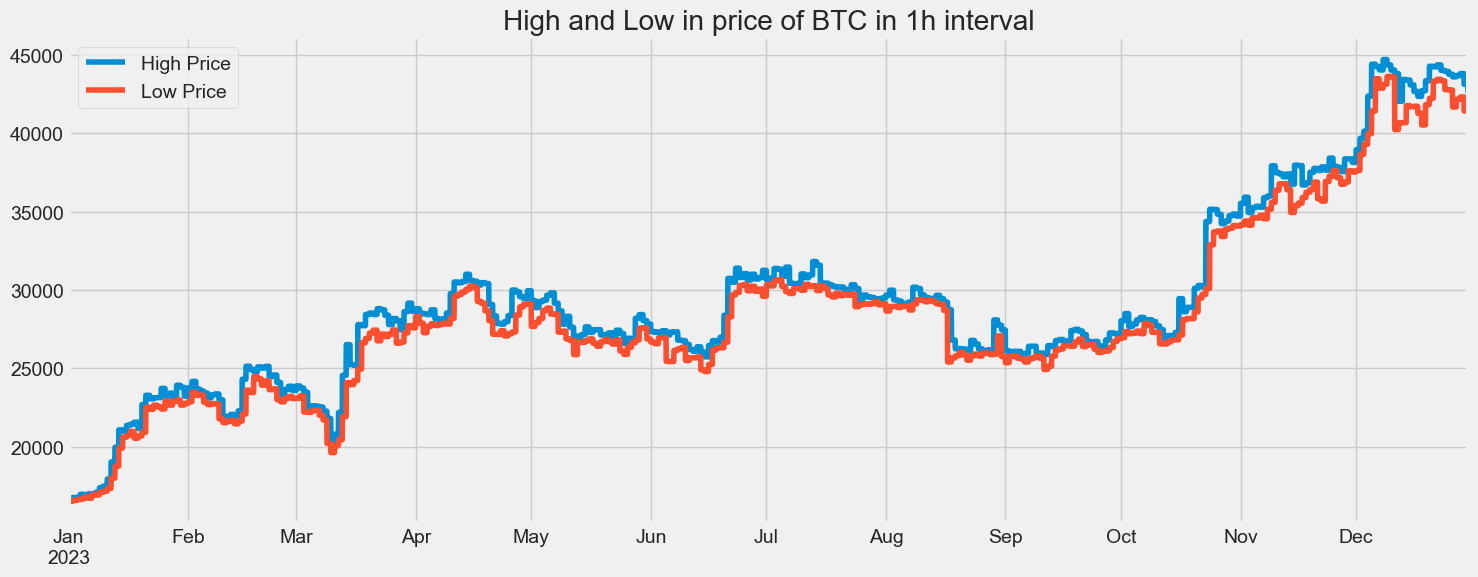

In [8]:
plt.figure(figsize=(15, 6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High and Low in price of BTC in 1h interval')
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
model = tf.keras.models.load_model('Model.h5')

In [10]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(8713, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))

In [12]:
train_size = int(len(data) * 0.01)
test_size = len(data) - train_size
print('Train Size: ', train_size, 'Test size: ', test_size)

Train Size:  87 Test size:  8626


In [13]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(87, 1)

In [14]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(train_data)):
    x_train.append(train_data[i-time_steps:i, :n_cols])
    y_train.append(train_data[i, :n_cols])
    if i <= time_steps:
        print('X_train: ', x_train)
        print('Y_train: ', y_train)

X_train:  [array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
       [0.00230164],
  

In [15]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [17]:
x_train.shape, y_train.shape

((27, 60, 1), (27, 1))

In [18]:
time_steps = 60
test_data = scaled_data[train_size-time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [19]:
x_test.shape , y_test.shape

((8626, 60, 1), (8626, 1))

In [20]:
predictions = model.predict(x_test)

270/270 [==============================] - 3s 10ms/step


In [21]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(8626, 1)

In [22]:
y_test = scaler.inverse_transform(y_test)

rmse = np.sqrt(np.mean(y_test-predictions)**2).round(2)
rmse

139.55

In [23]:
preds_acts = pd.DataFrame(data={'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})
preds_acts

,Predictions,Actuals
0,16919.878906,16863.238281
1,16920.410156,16863.238281
2,16920.820312,16863.238281
3,16921.146484,16863.238281
4,16921.406250,16863.238281
...,...,...
8621,42010.515625,42099.402344
8622,42010.285156,42099.402344
8623,42010.089844,42099.402344
8624,42009.921875,42099.402344


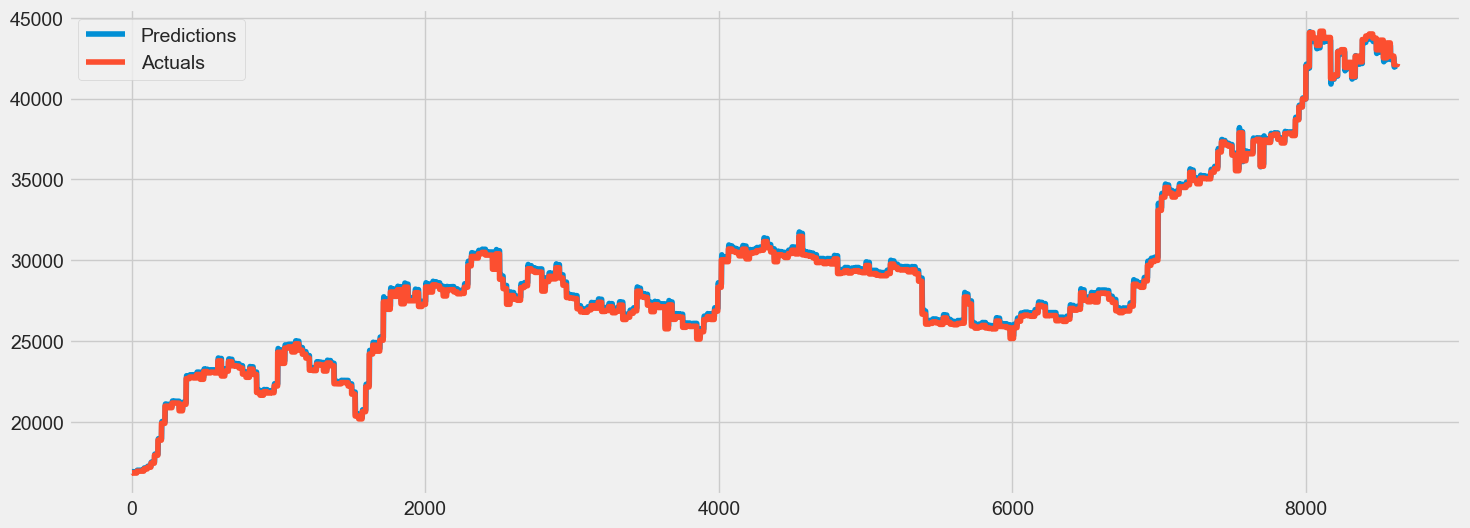

In [24]:
plt.figure(figsize=(16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

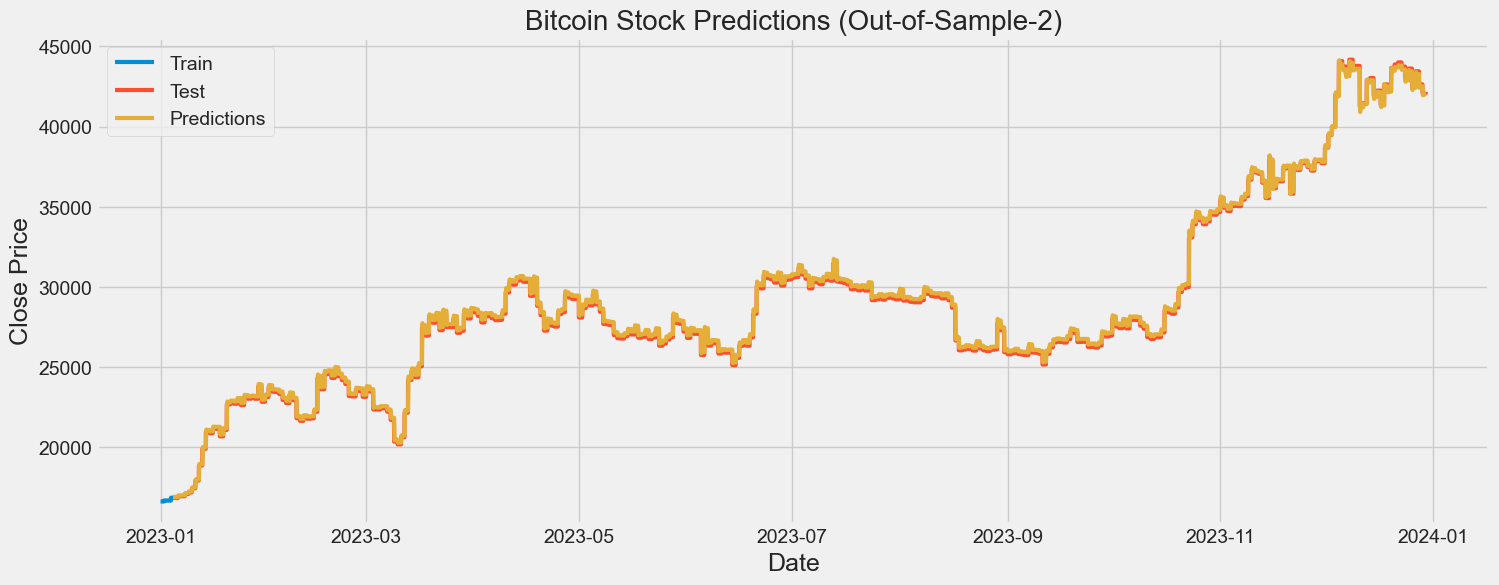

In [26]:
train = dataset.iloc[:train_size, 0:1]
test = dataset.iloc[train_size:, 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Bitcoin Stock Predictions (Out-of-Sample-2)', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train[r'Close'], linewidth=3)
plt.plot(test[r'Close'], linewidth=3)


plt.plot(test['Predictions'], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])